## **Machine Learning Algorithms ➡ Income-level categorization**

In [1]:
!curl https://raw.githubusercontent.com/Angelaruizalvarez/Mental-Health-ML-Algorithms/main/df_income.csv > df_income.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8457  100  8457    0     0  26699      0 --:--:-- --:--:-- --:--:-- 26762


## Classification Algorithms

We used different classification algorithms for the categorization categorization regarding income level database, further plotting all the results and evaluating their accuracy. We plot two different mental health disorders against each other, mapping every single % of population for each year in all the time span for the 4 categories, each represented by a colour described in the legend. All combinations are shown in this section.

In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from itertools import combinations

dfc = pd.read_csv("df_income.csv").dropna()


# List of mental health disorders
disorders = [
    "Schizophrenia disorders",
    "Depressive disorders",
    "Anxiety disorders",
    "Bipolar disorders",
    "Eating disorders",
]

# All possible combinations
combinations_of_disorders = list(combinations(disorders, 2))


In [3]:
# Change income category codes into numbers with Label Encoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dfc["Code"]) #all year values

ddbb = dfc  #all year values


### Logistic Regression


<Figure size 1500x1200 with 0 Axes>

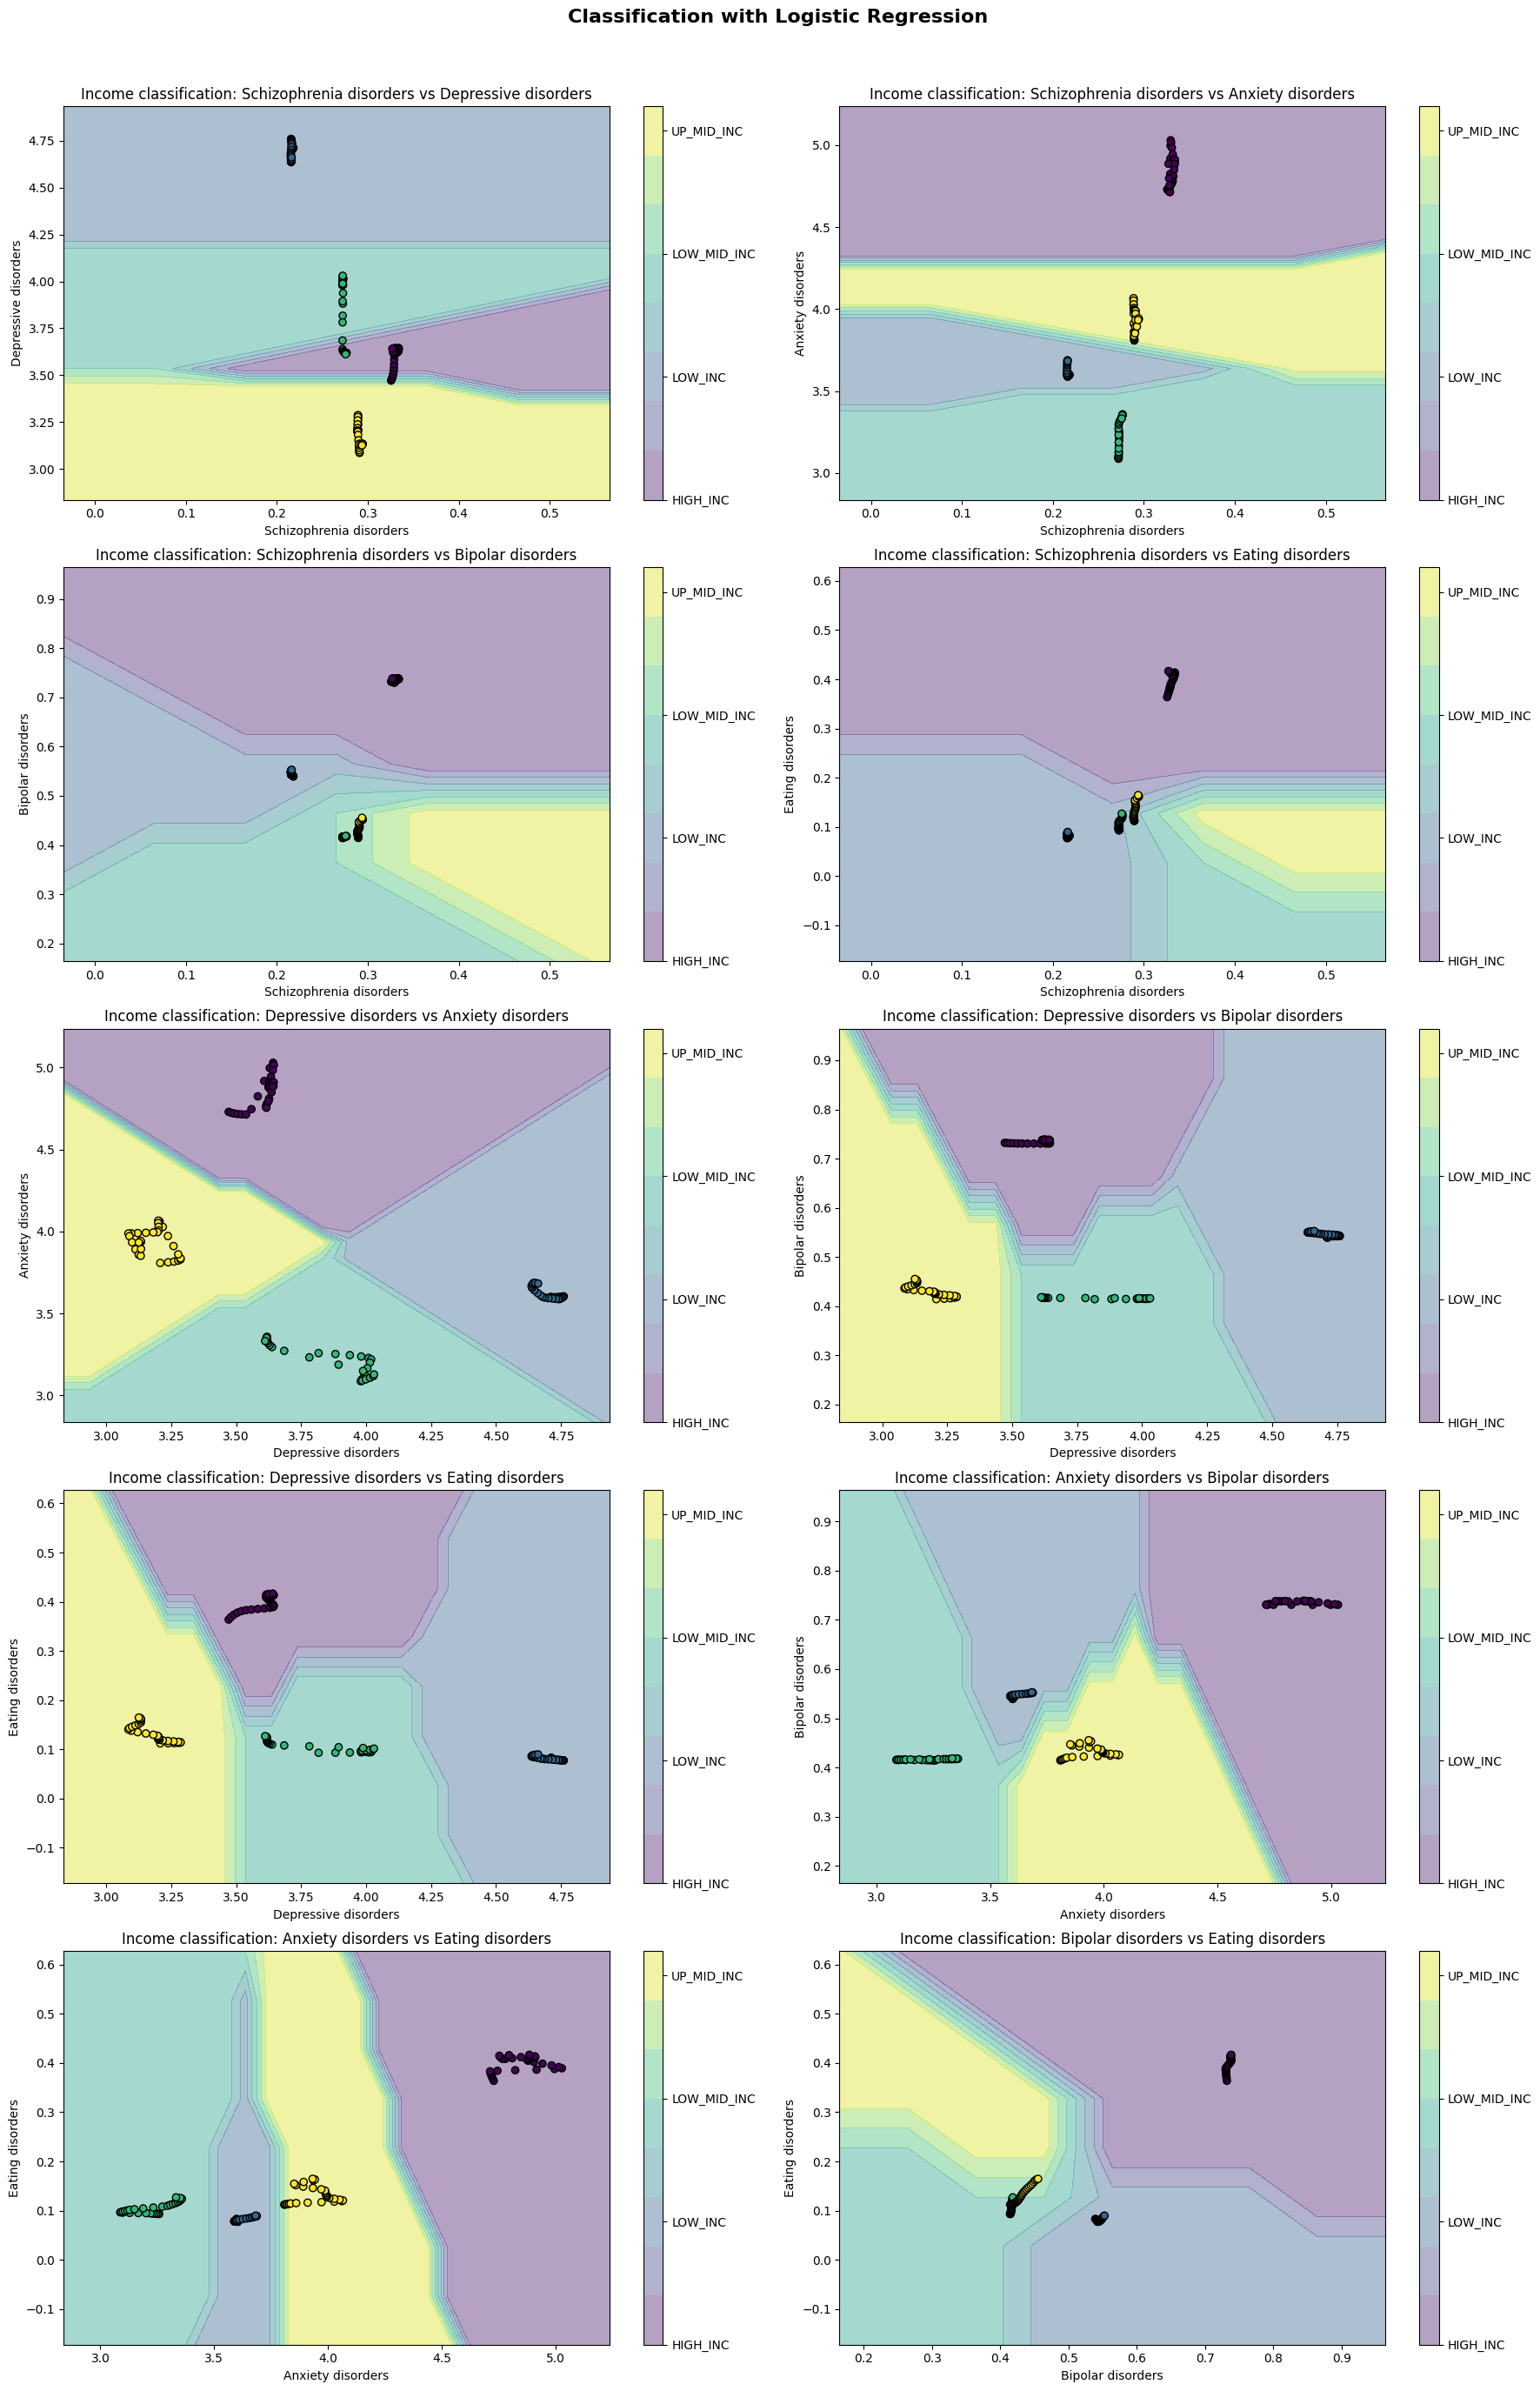

In [4]:
from sklearn.linear_model import LogisticRegression

# Create figure for subgraphs
plt.figure(figsize=(15, 12)) # graphs are very small with this size/proportion
plt.figure(figsize=(18, 28))

for i, (disorder1, disorder2) in enumerate(combinations_of_disorders):
    plt.subplot(5, 2, i + 1)  # subgraphs 5x2 (as we have 10 combinations)

    # We select 2 of them as characteristics of the model
    X = ddbb[[disorder1, disorder2]].values

    # Logistic Regression Model Training (using all the values from different years)
    model = LogisticRegression(solver="lbfgs", max_iter=1000)
    model.fit(X, y)  # Usamos la versión codificada de y

    # Decission regions
    x_min, x_max = X[:, 0].min() - 0.25, X[:, 0].max() + 0.25
    y_min, y_max = X[:, 1].min() - 0.25, X[:, 1].max() + 0.25
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict the class on each point -> for colouring of the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decission regions
    contour = plt.contourf(xx, yy, Z, alpha=0.4, cmap="viridis")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="viridis")
    plt.xlabel(disorder1)
    plt.ylabel(disorder2)
    plt.title(f"Income classification: {disorder1} vs {disorder2}")

    # Legend
    income_codes = label_encoder.classes_
    cbar = plt.colorbar(contour)
    cbar.set_ticks(np.linspace(0, len(income_codes) - 1, len(income_codes)))
    cbar.set_ticklabels(income_codes)

# Title for all the graphs in general
plt.suptitle('Classification with Logistic Regression', fontsize=16, fontweight='bold')

# some adjustments for a clearer plotting
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()


### Decision Tree

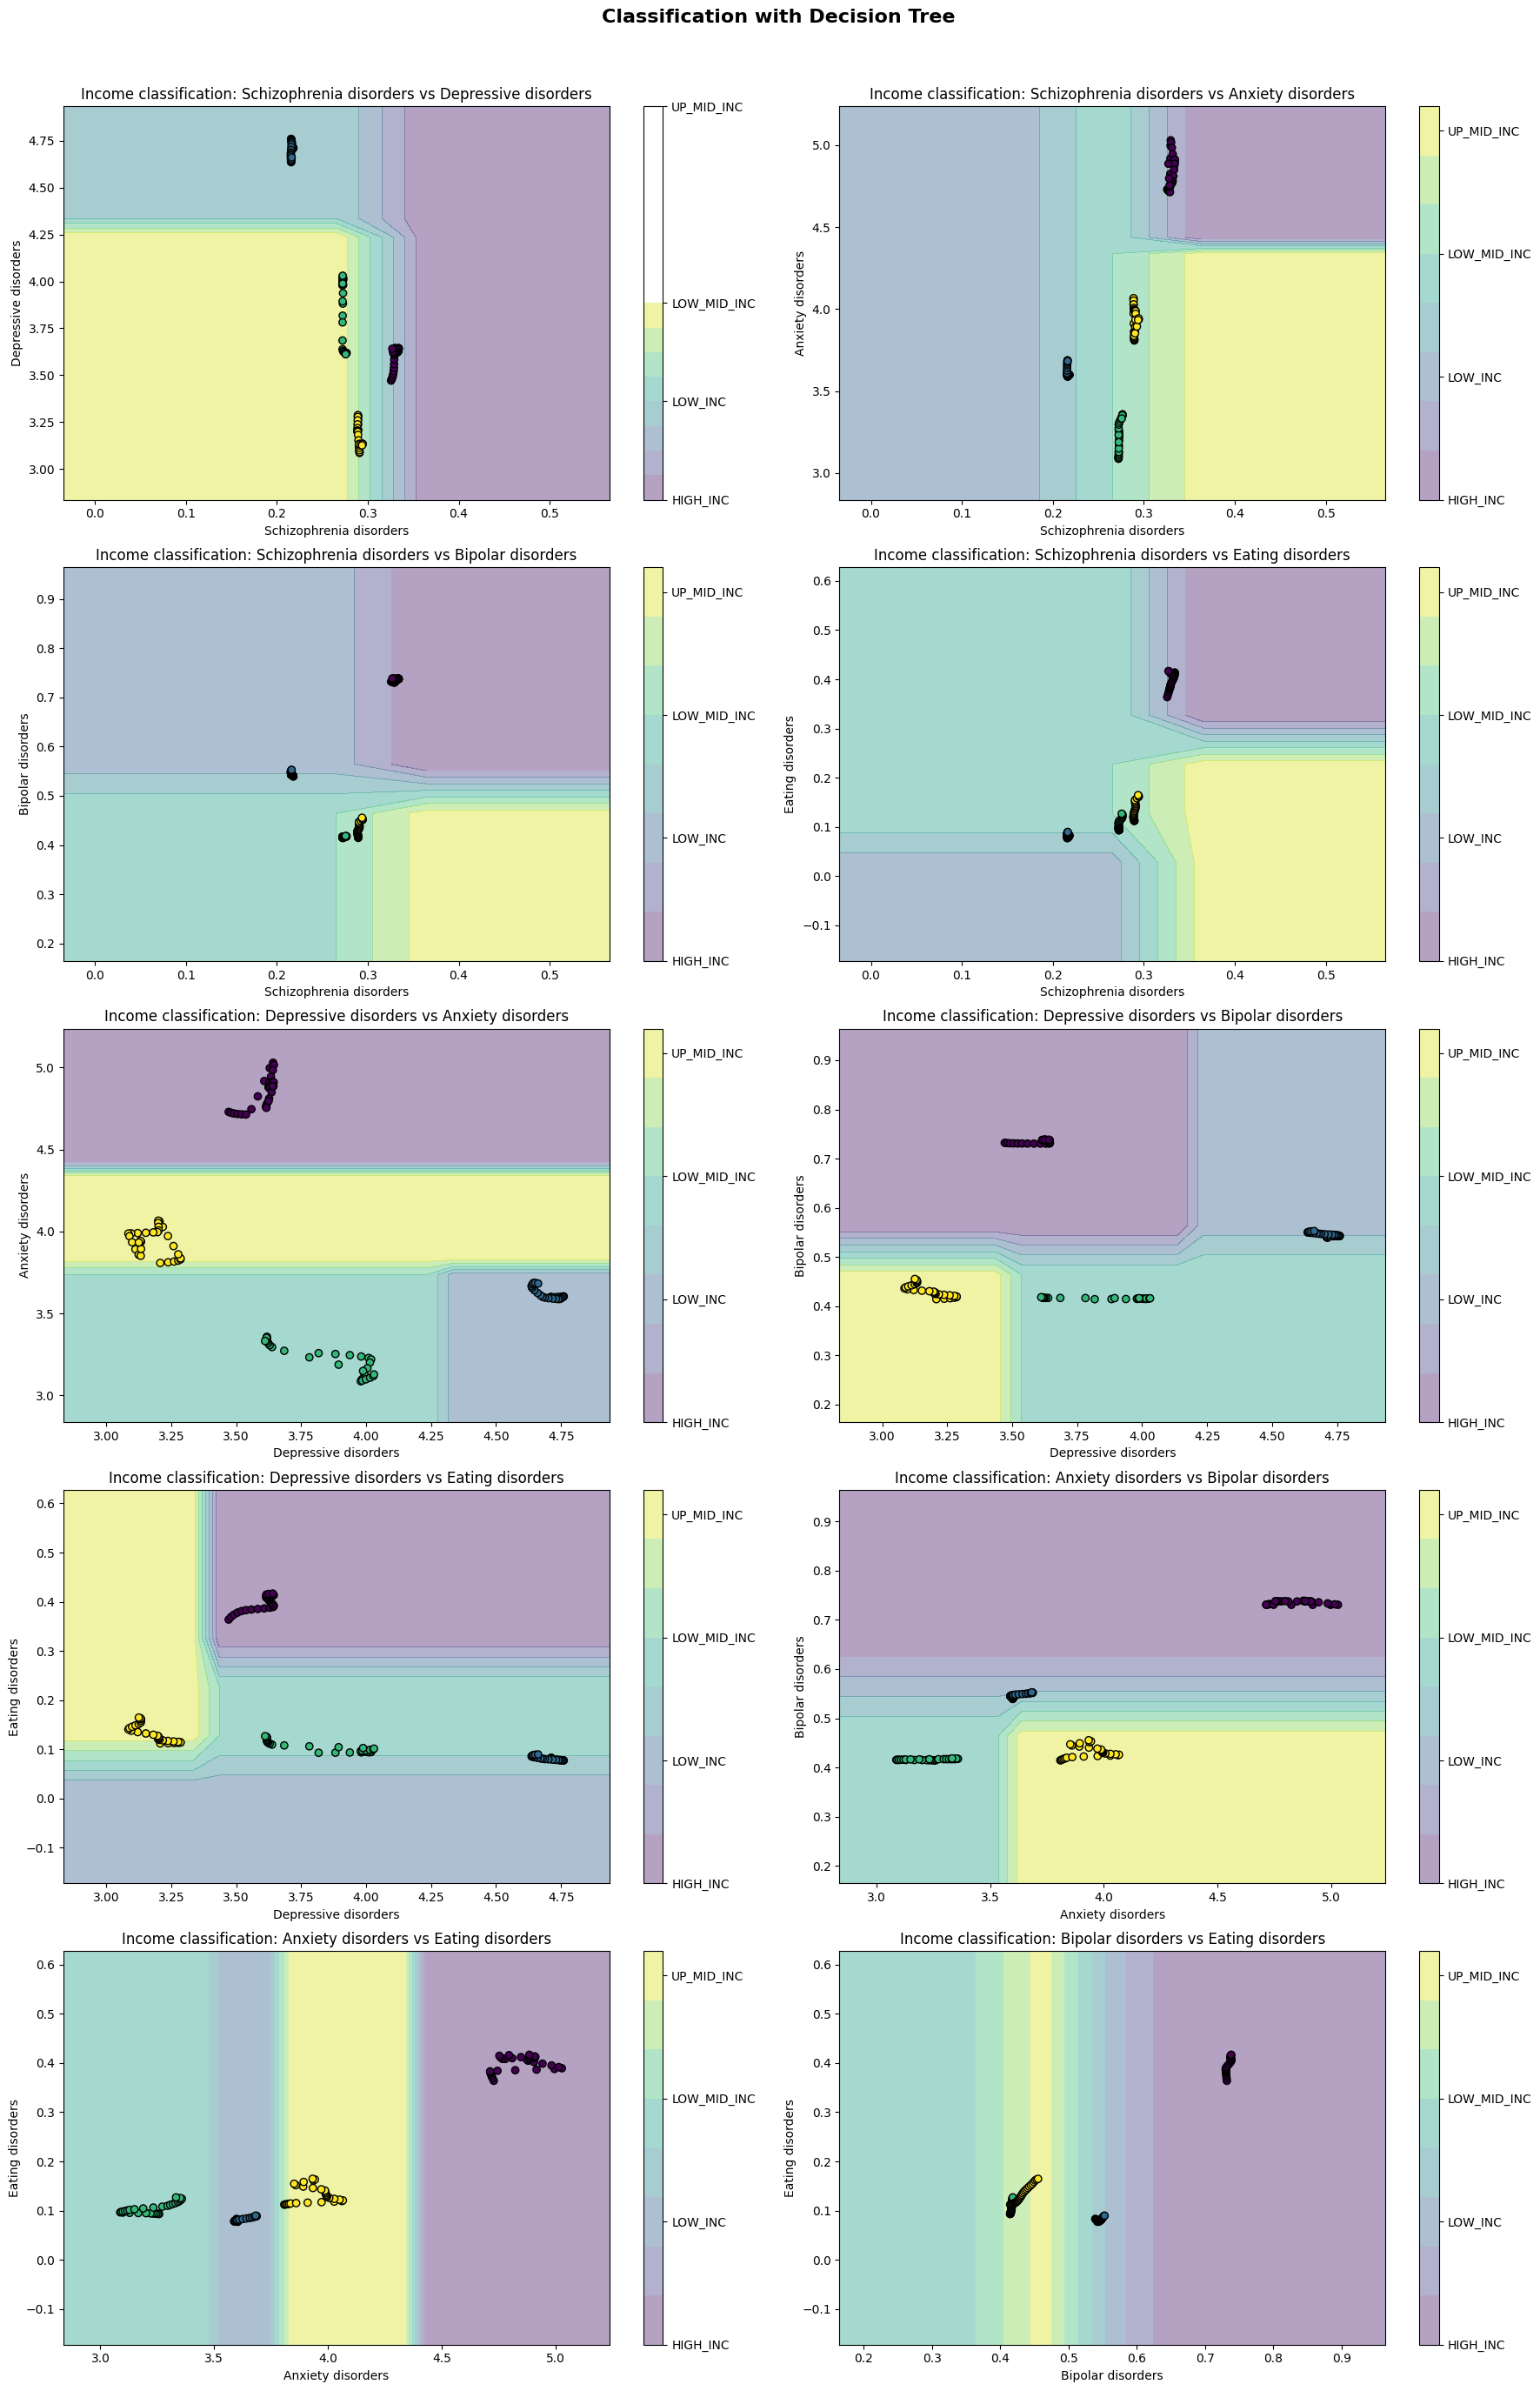

In [5]:
from sklearn.tree import DecisionTreeClassifier

plt.figure(figsize=(18, 28))

for i, (disorder1, disorder2) in enumerate(combinations_of_disorders):
    plt.subplot(5, 2, i + 1)

    X = ddbb[[disorder1, disorder2]].values

    # Decission Tree Model Training
    model = DecisionTreeClassifier()
    model.fit(X, y)

    x_min, x_max = X[:, 0].min() - 0.25, X[:, 0].max() + 0.25
    y_min, y_max = X[:, 1].min() - 0.25, X[:, 1].max() + 0.25
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    contour = plt.contourf(xx, yy, Z, alpha=0.4, cmap="viridis")
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="viridis")
    plt.xlabel(disorder1)
    plt.ylabel(disorder2)
    plt.title(f"Income classification: {disorder1} vs {disorder2}")

    income_codes = label_encoder.classes_
    cbar = plt.colorbar(contour)
    cbar.set_ticks(np.linspace(0, len(income_codes) - 1, len(income_codes)))
    cbar.set_ticklabels(income_codes)

plt.suptitle('Classification with Decision Tree', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

### Random Forest

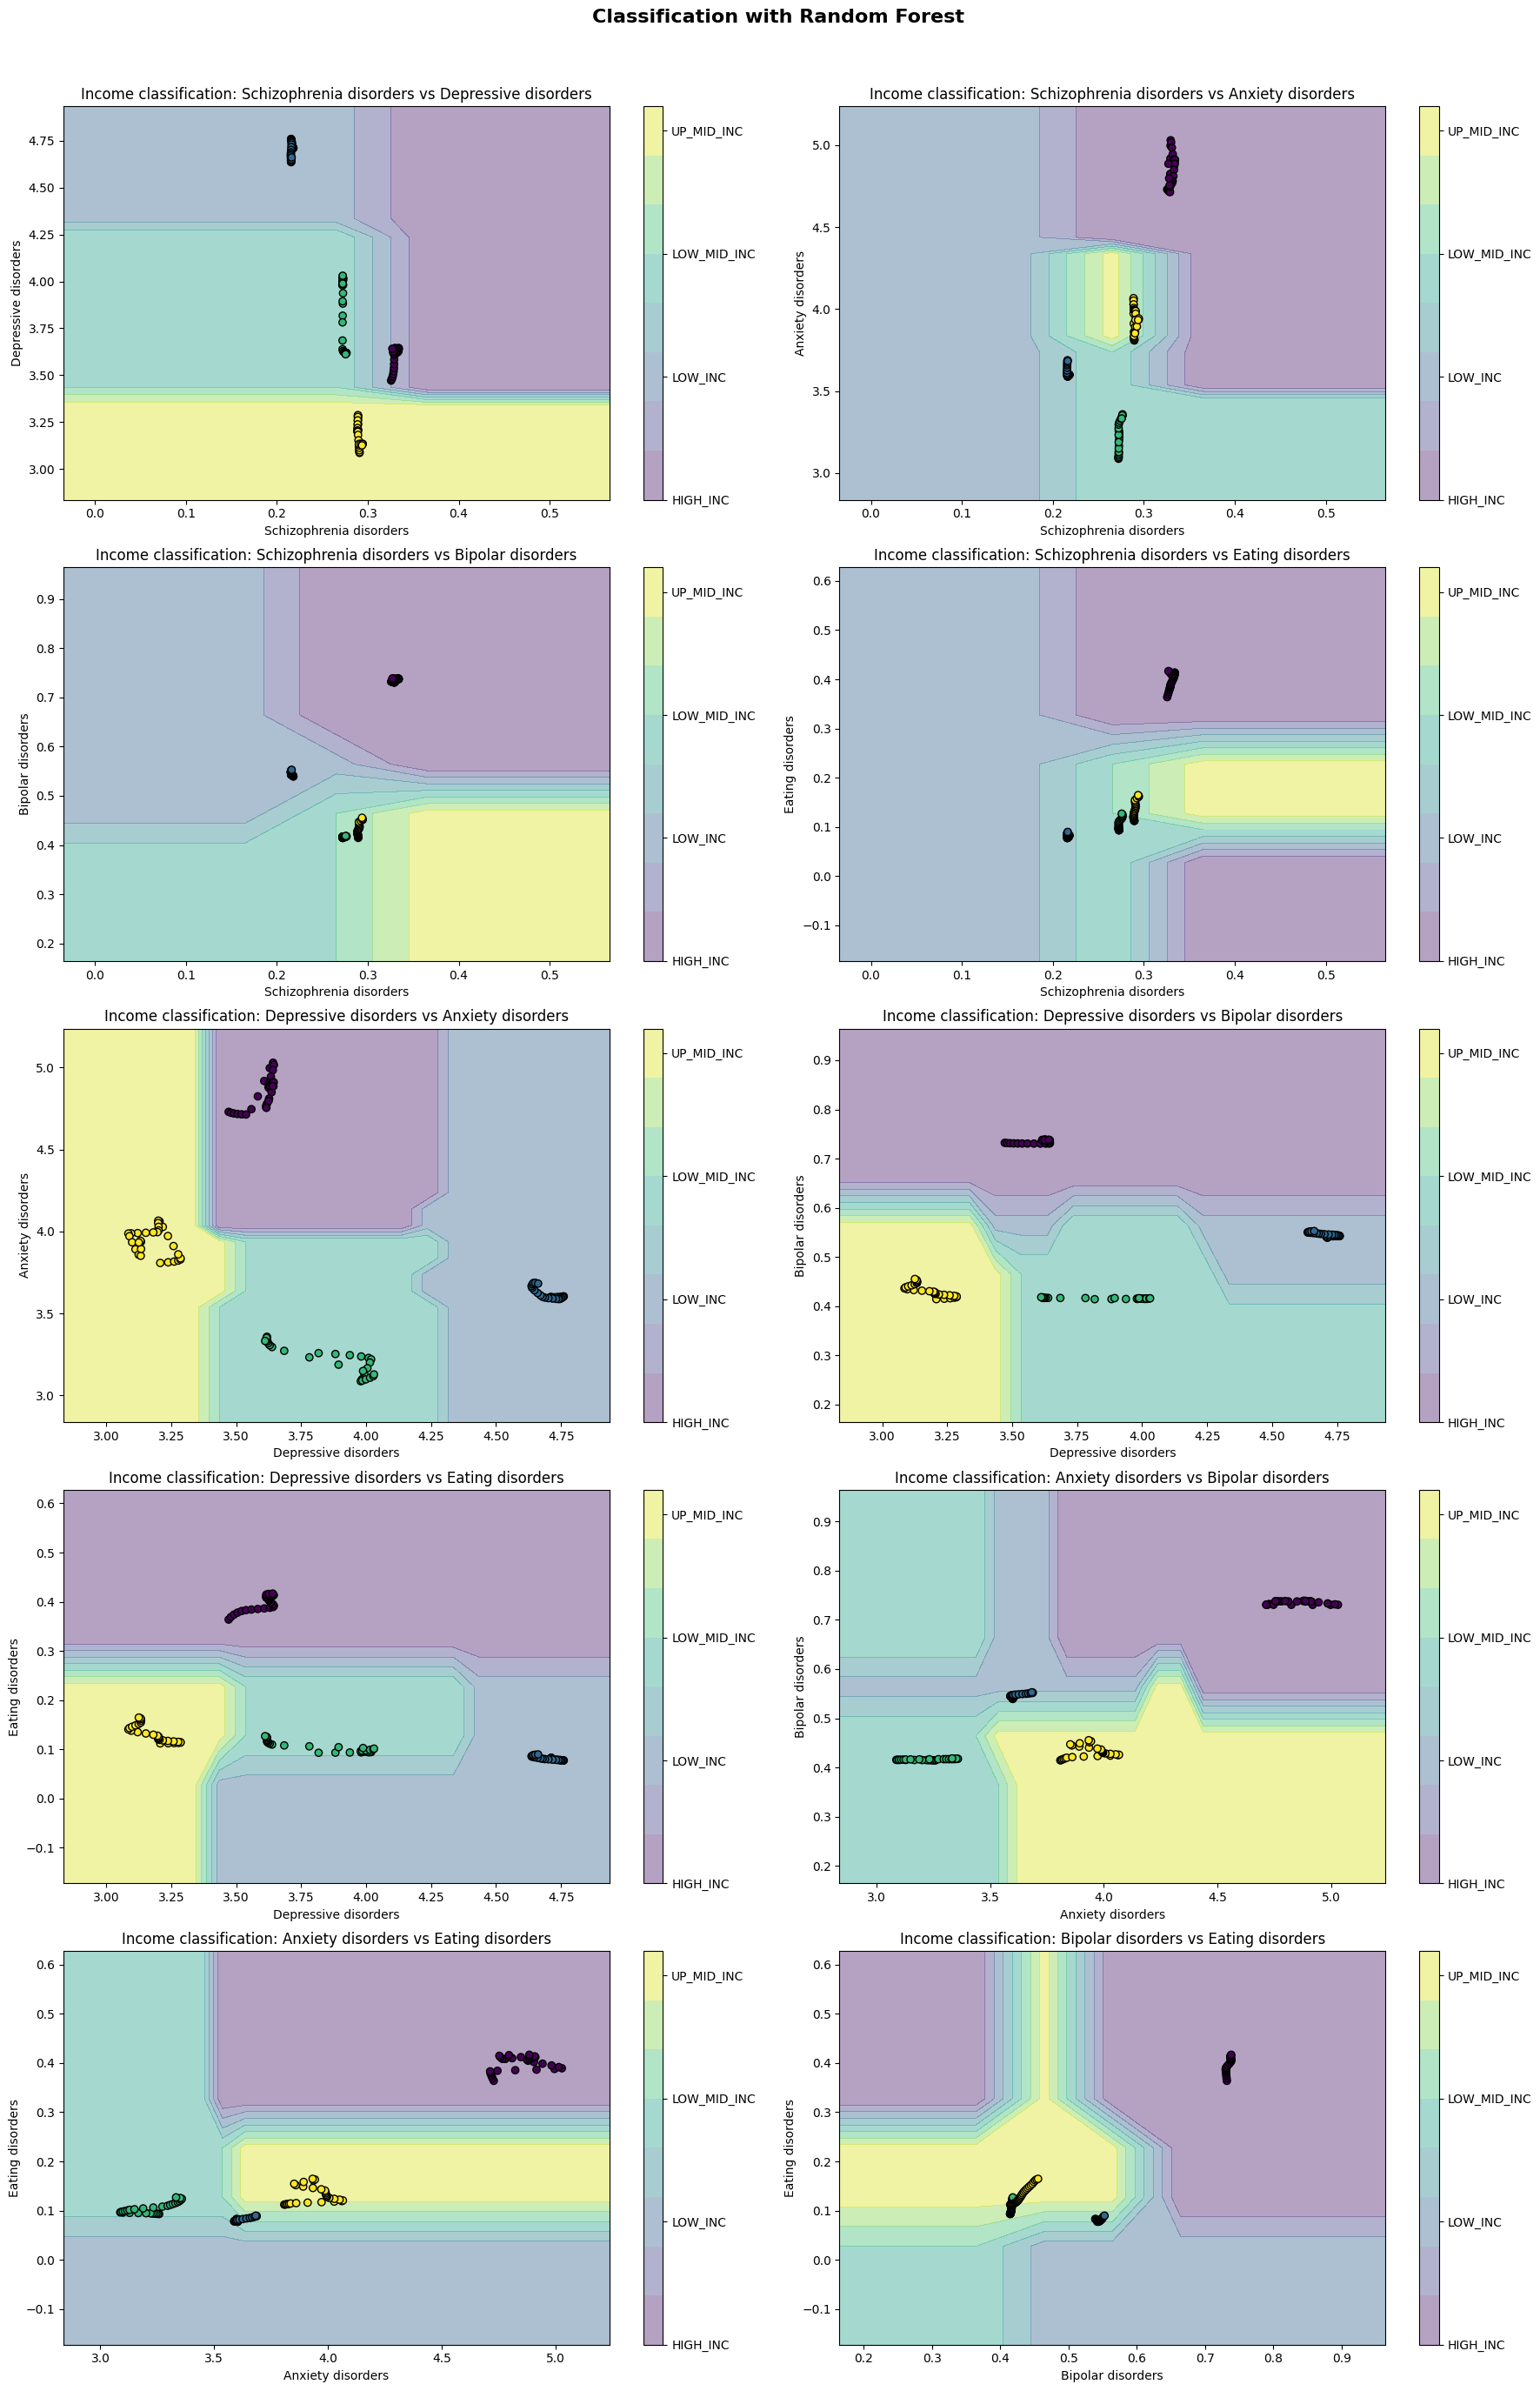

In [6]:
from sklearn.ensemble import RandomForestClassifier

plt.figure(figsize=(18, 28))

for i, (disorder1, disorder2) in enumerate(combinations_of_disorders):
    plt.subplot(5, 2, i + 1)

    X = ddbb[[disorder1, disorder2]].values

    # Random Forest Model Training
    model = RandomForestClassifier(n_estimators=100) # estimator como el profe MIRAR
    model.fit(X, y)

    x_min, x_max = X[:, 0].min() - 0.25, X[:, 0].max() + 0.25
    y_min, y_max = X[:, 1].min() - 0.25, X[:, 1].max() + 0.25
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    contour = plt.contourf(xx, yy, Z, alpha=0.4, cmap="viridis")
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="viridis")
    plt.xlabel(disorder1)
    plt.ylabel(disorder2)
    plt.title(f"Income classification: {disorder1} vs {disorder2}")

    income_codes = label_encoder.classes_
    cbar = plt.colorbar(contour)
    cbar.set_ticks(np.linspace(0, len(income_codes) - 1, len(income_codes)))
    cbar.set_ticklabels(income_codes)

plt.suptitle('Classification with Random Forest', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

### K Nearest Neighbour

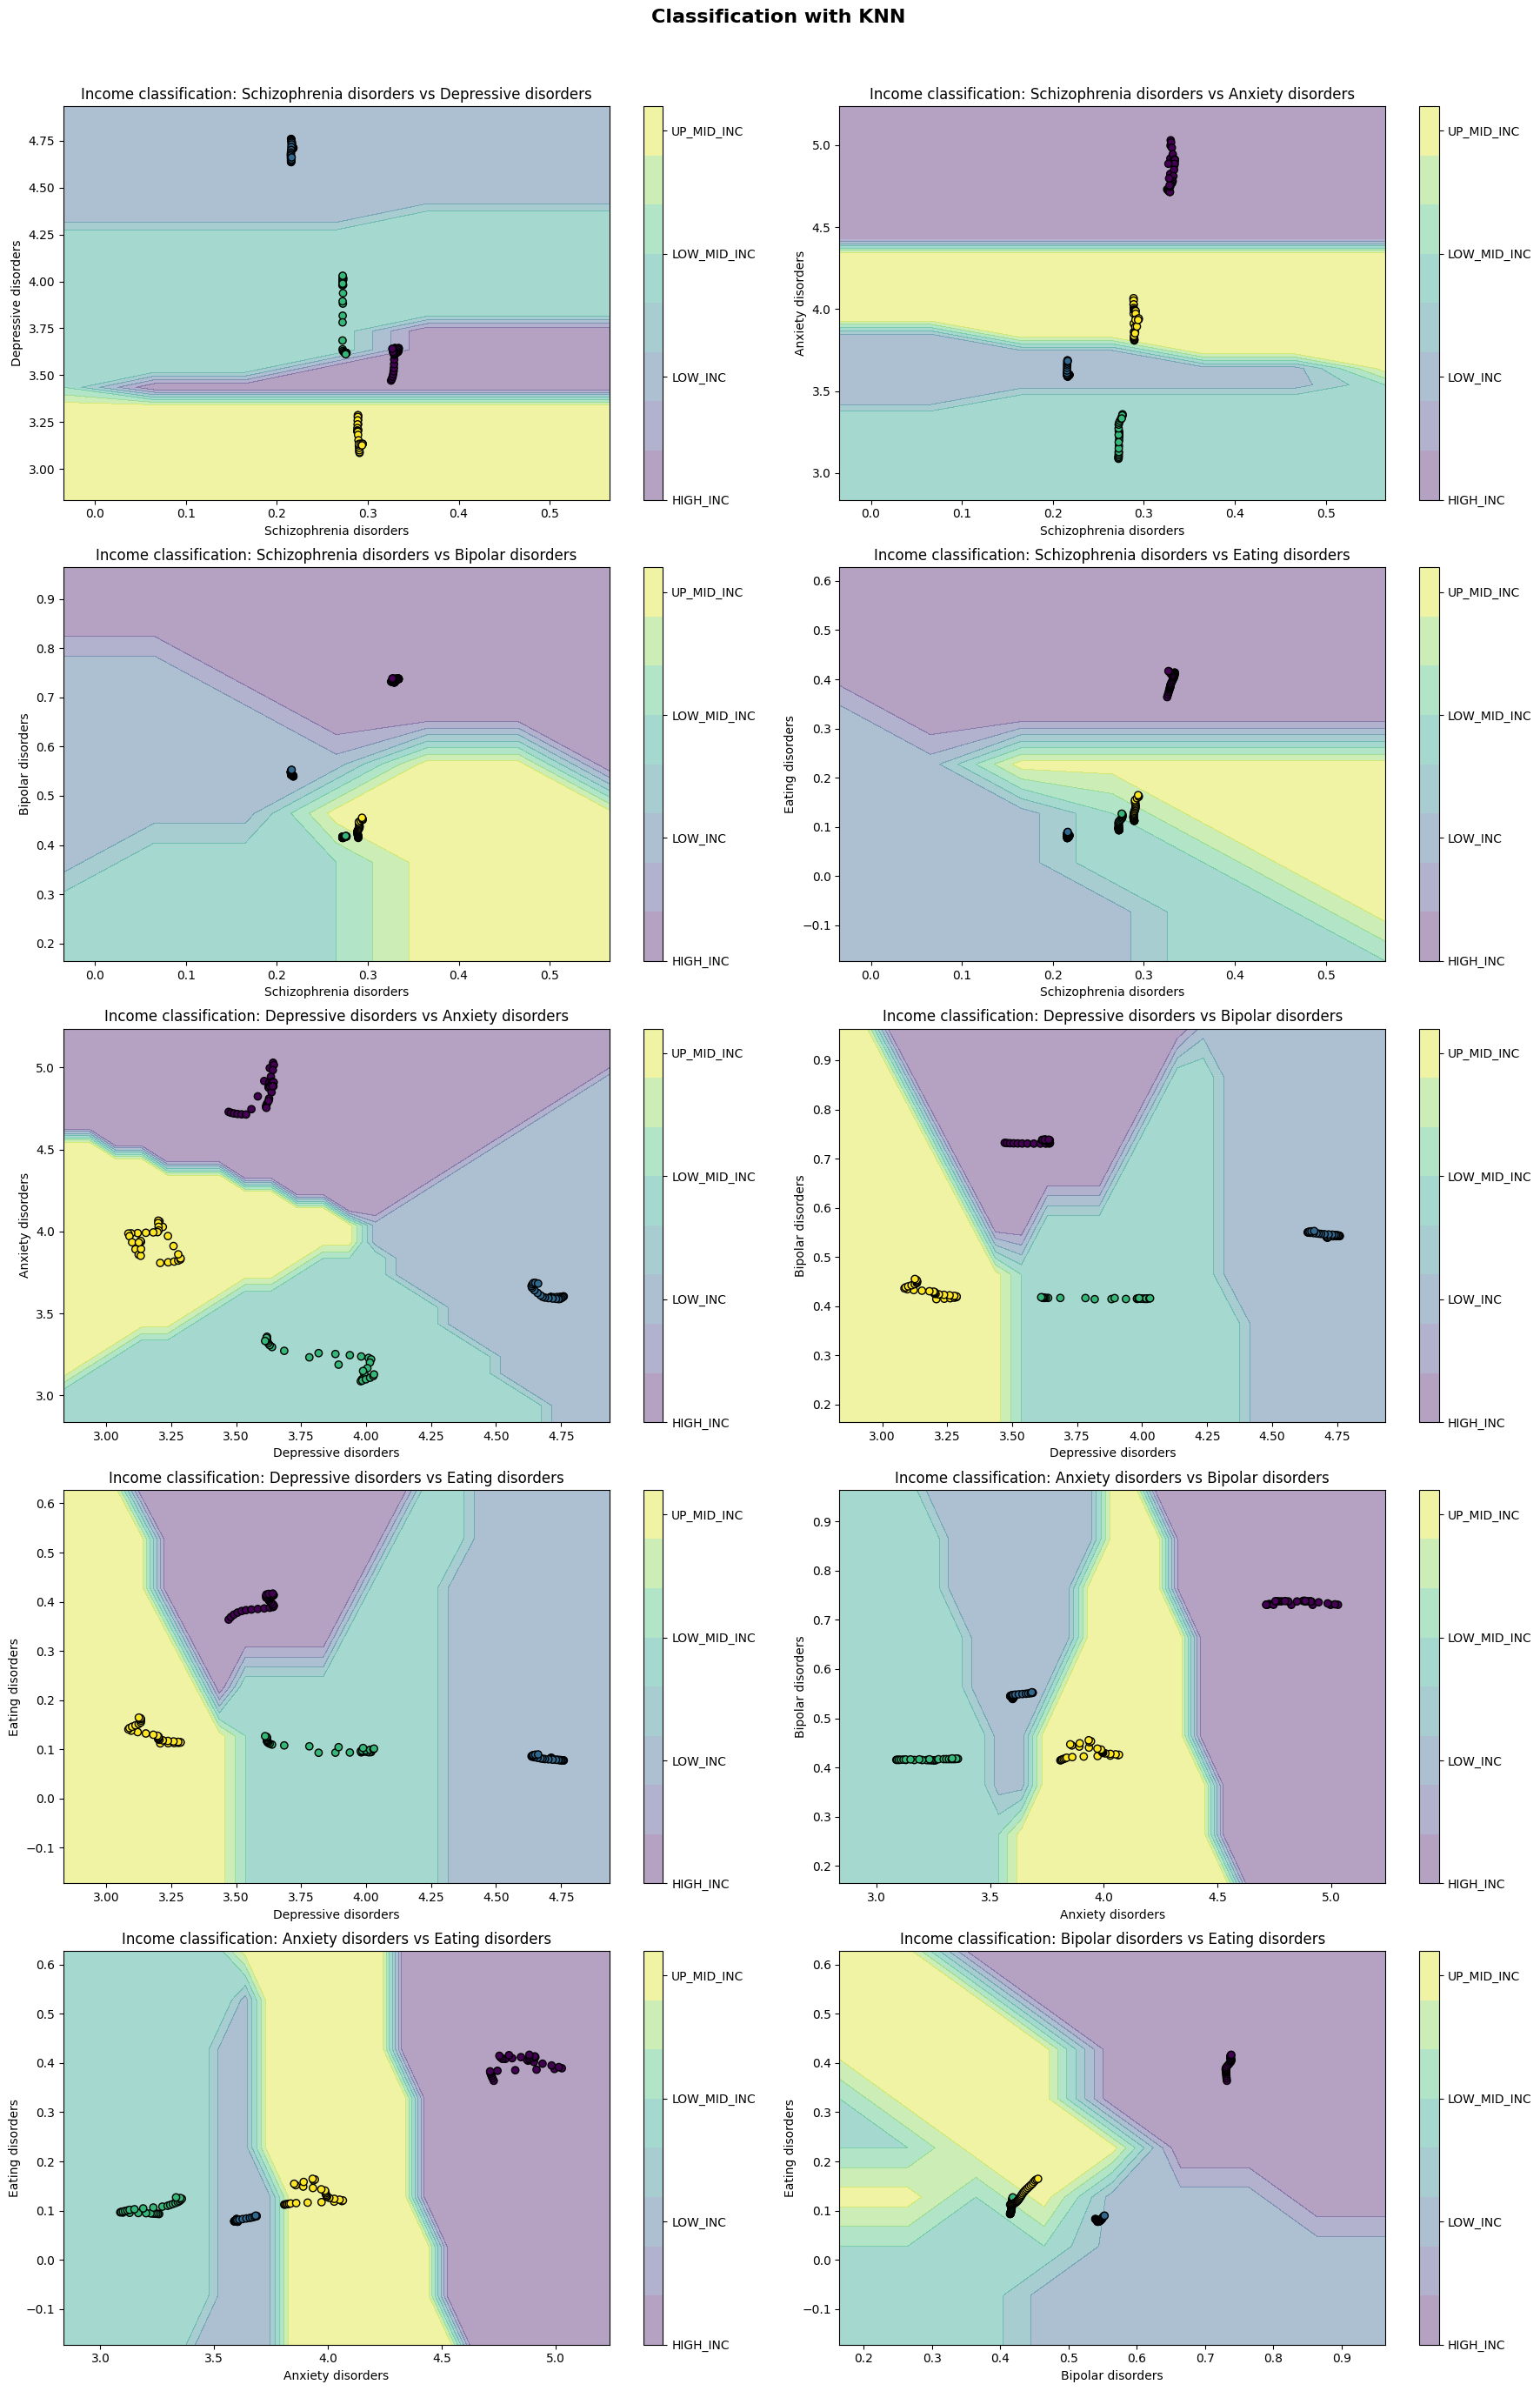

In [7]:
from sklearn.neighbors import KNeighborsClassifier

plt.figure(figsize=(18, 28))

for i, (disorder1, disorder2) in enumerate(combinations_of_disorders):
    plt.subplot(5, 2, i + 1)

    X = ddbb[[disorder1, disorder2]].values

    # KNeighbors Model Training
    model = KNeighborsClassifier(n_neighbors=5) # numero de neighbours del profe
    model.fit(X, y)

    x_min, x_max = X[:, 0].min() - 0.25, X[:, 0].max() + 0.25
    y_min, y_max = X[:, 1].min() - 0.25, X[:, 1].max() + 0.25
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    contour = plt.contourf(xx, yy, Z, alpha=0.4, cmap="viridis")
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="viridis")
    plt.xlabel(disorder1)
    plt.ylabel(disorder2)
    plt.title(f"Income classification: {disorder1} vs {disorder2}")

    income_codes = label_encoder.classes_
    cbar = plt.colorbar(contour)
    cbar.set_ticks(np.linspace(0, len(income_codes) - 1, len(income_codes)))
    cbar.set_ticklabels(income_codes)

plt.suptitle('Classification with KNN', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

### Perceptron

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


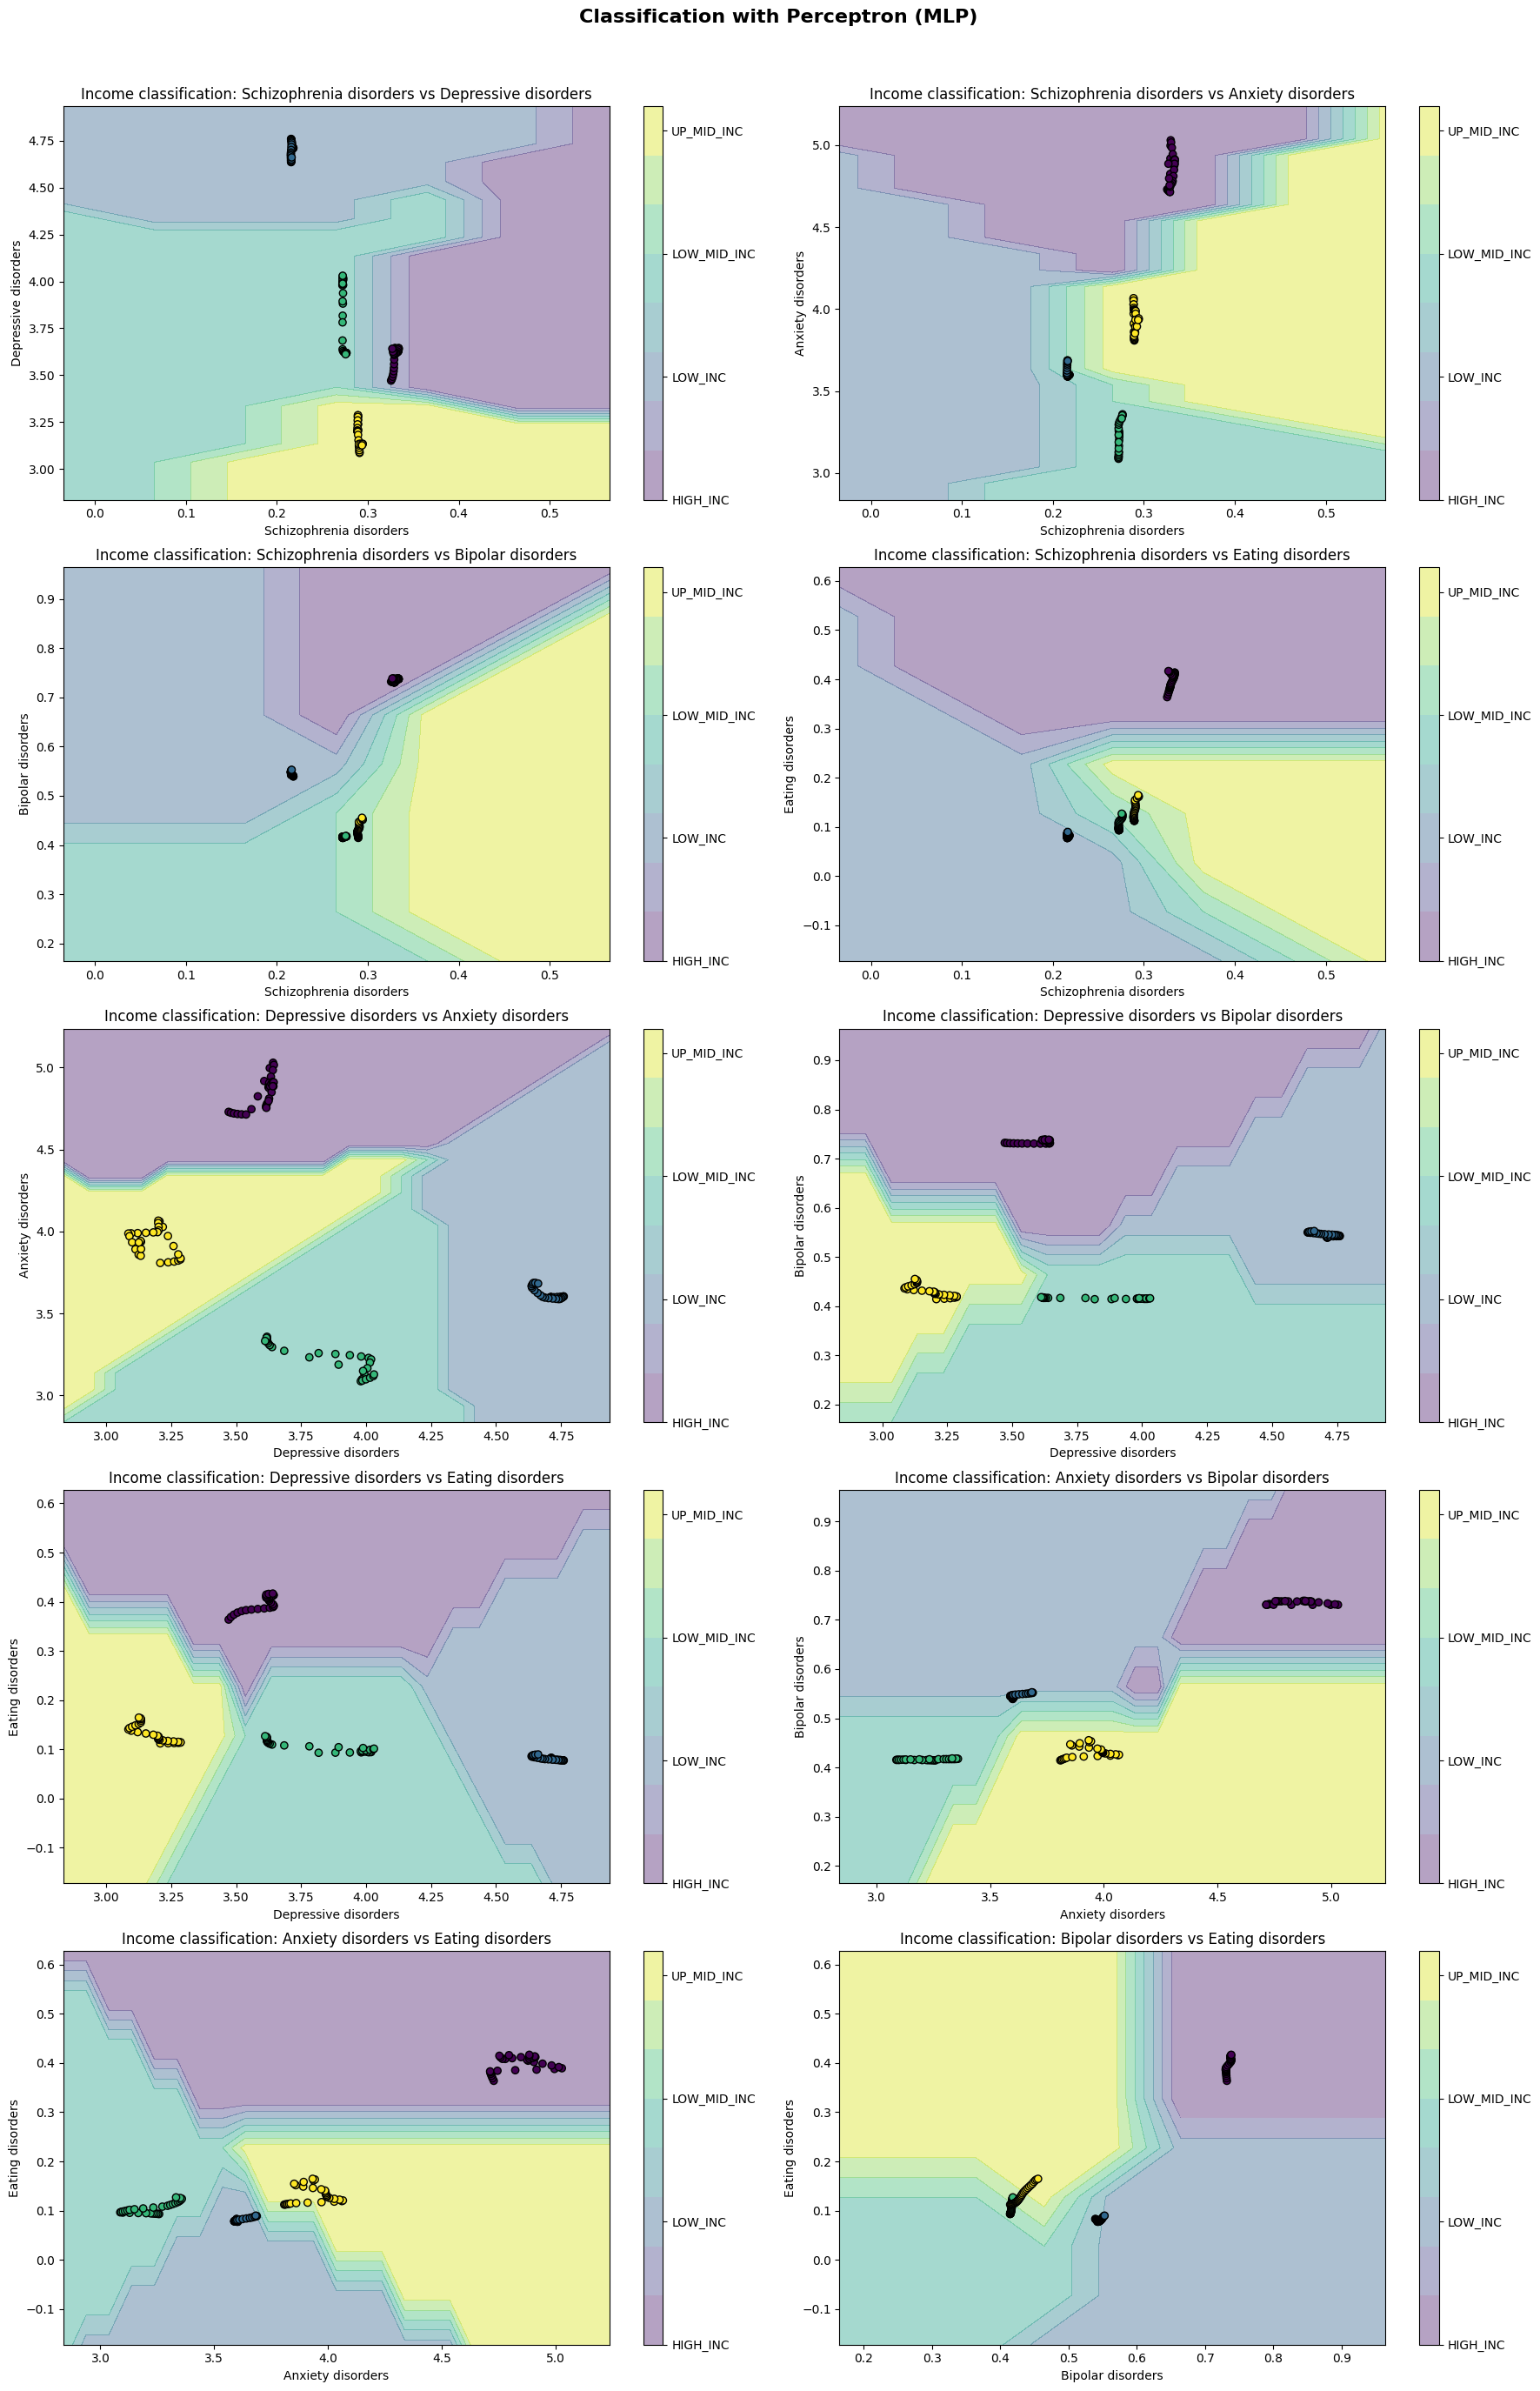

In [8]:
from sklearn.neural_network import MLPClassifier

plt.figure(figsize=(18, 28))

for i, (disorder1, disorder2) in enumerate(combinations_of_disorders):
    plt.subplot(5, 2, i + 1)

    X = ddbb[[disorder1, disorder2]].values

    # MLP (Perceptron) Model Training
    model = MLPClassifier(max_iter=2000)
    model.fit(X, y)  # Using the encoded version of y

    x_min, x_max = X[:, 0].min() - 0.25, X[:, 0].max() + 0.25
    y_min, y_max = X[:, 1].min() - 0.25, X[:, 1].max() + 0.25
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    contour = plt.contourf(xx, yy, Z, alpha=0.4, cmap="viridis")
    plt.xlabel(disorder1)
    plt.ylabel(disorder2)
    plt.title(f"Income classification: {disorder1} vs {disorder2}")

    income_codes = label_encoder.classes_
    cbar = plt.colorbar(contour)
    cbar.set_ticks(np.linspace(0, len(income_codes) - 1, len(income_codes)))
    cbar.set_ticklabels(income_codes)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="viridis")
    plt.suptitle('Classification with Perceptron (MLP)', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()
